<a href="https://colab.research.google.com/github/sanmghj/darknet-YOLOV4-_UseColab/blob/main/darknet(yolov4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google drive 마운트
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# 경로를 재설정
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/yolov4

In [ ]:
# darknet을 github에서 복제
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# darknet 폴더로 이동
%cd darknet/

In [ ]:
# make하기전 설정 재설정
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

In [ ]:
# make 실행
!make

In [ ]:
# 훈련시킬 라벨링 사진 압축해제
!unzip /mydrive/yolov4/obj.zip -d data/obj

In [ ]:
# yolov4-cutom.cfg파일 복사
!cp /mydrive/yolov4/yolov4-custom.cfg cfg

In [ ]:
# obj.names, obj.data파일 복사 obj.names, obj.data파일 복사
!cp /mydrive/yolov4/obj.names data
!cp /mydrive/yolov4/obj.data  data

In [ ]:
# train.txt, test.txt를 만들기 위한 process.py파일 복사 및 실행
!cp /mydrive/yolov4/process.py .
!python process.py

/content/gdrive/My Drive/yolov4/darknet


In [ ]:
# 데이터 확인
!ls data/

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show -map

In [29]:
# define helper functions
def imShow(path):
	import cv2	
	import matplotlib.pyplot as plt
	%matplotlib inline

	image = cv2.imread(path)
	height, width = image.shape[:2]
	resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
	
	fig = plt.gcf()
	fig.set_size_inches(18, 10)
	plt.axis("off")
	plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
	plt.show()


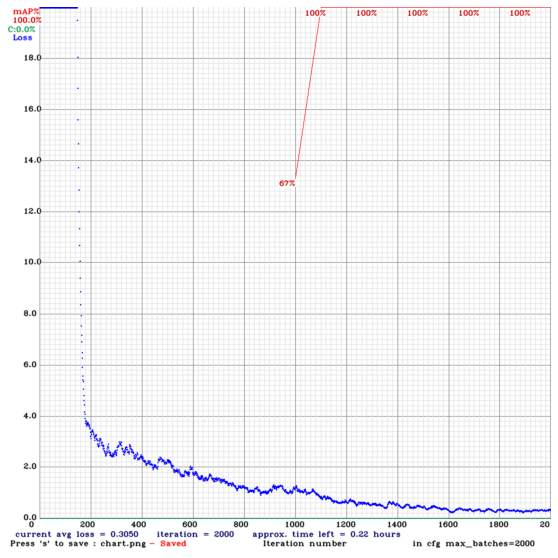

In [30]:
imShow('chart.png')

In [19]:
!chmod +x ./darknet

In [21]:
# yolov4-custom_xxxx부분은 ex.)yolov4-custom_1000.weights, yolov4-custom_2000.weights파일들 중 골라서 쓰면된다.
!./darknet detector map data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights -points 0

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-custom.cfg
%cd ..

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv   

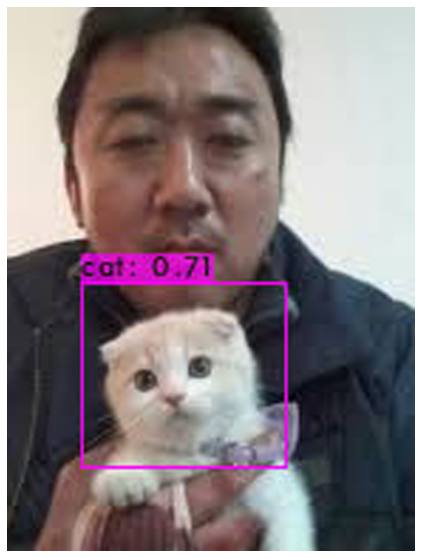

In [34]:
!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights /mydrive/yolov4/test/cat.jpg -thresh 0.3
imShow('predictions.jpg')